# COUNTRY

According with the requirements, the most difficult requeriment designers like to go to design talks and share knowledge. There must be some nearby companies that also do design, and developers like to be near successful tech startups that have raised at least 1 Million dollars. It is important to measure these two requirement around the world as we don't want to choose a country where the number of this kind of companies is null. I will use moondoDB to get this informatio from the dataset Companies.

In [ ]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

In [356]:
client = MongoClient()
db = client.get_database("companies")
len(list(db.companies.find({})))

# Tech startups that have raised > 1 M dollars

In [358]:
#I will consider a startup those companies companies founded 10 years ago and still on going:
filter_query={"founded_year":{"$gte":2010},"deadpooled_year":{"$ne":"null"}}
project={"offices.country_code":1,'_id':0,"total_money_raised":1,"category_code":1}
res=list(db.companies.find(filter_query,project))
len(res)

146

In [374]:
df = pd.DataFrame(res)

In [360]:
#I check the categories in this first filter:
print(df["category_code"].unique())

['web' 'finance' 'search' 'mobile' 'enterprise' 'messaging' 'other'
 'ecommerce' 'advertising' 'hospitality' None 'games_video' 'analytics'
 'software' 'consulting' 'network_hosting' 'social' 'travel' 'photo_video'
 'security' 'biotech' 'cleantech' 'fashion' 'education']


### 1. Query by category in relation with technology:

In [361]:
# I make a new mongo query, this time with the following tech category_code: 'web', 'mobile', 
# 'games_video', 'software', 'photo_video', 'biotech' and 'cleantech' and the state code:

filter_query={"founded_year":{"$gte":2010},"deadpooled_year":{"$ne":"null"},"category_code":
              {"$in":['web', 'mobile', 'games_video', 'software', 'photo_video', 'biotech', 'cleantech']}}
project={"offices.country_code":1,'offices.state_code':1, '_id':0,"total_money_raised":1}
res=list(db.companies.find(filter_query,project))
df = pd.DataFrame(res)

### 2. Cleaning dataframe:

In [363]:
df.head()

,total_money_raised,offices
0,$0,"[{'state_code': None, 'country_code': 'USA'}]"
1,$7.1M,"[{'state_code': 'CA', 'country_code': 'USA'}]"
2,$0,"[{'state_code': None, 'country_code': 'DEU'}, ..."
3,$8M,"[{'state_code': 'CA', 'country_code': 'USA'}]"
4,€3M,[]


In [364]:
# I clean the "total_money_raised" column to get a flot type:
df["total_money_raised"]=[i[1:] for i in df["total_money_raised"]]
df["total_money_raised"]=[i[:-1] if len(i)>1 else i for i in df["total_money_raised"]]  
df["total_money_raised"]=pd.to_numeric(df["total_money_raised"])

### 3. Filtering data:

In [365]:
# I discart all companies with less than 1 Million dollar raised:
df = df[df["total_money_raised"] >= 1]

In [387]:
# I discard all companies with no office country/state code, I clean the "offices" column and I create a dataframe:
df["del_empty"]=[len(value) for  index, value in df["offices"].items()]
df = df[df["del_empty"] >= 1]
unpack_lst=[v for i, v in df["offices"].items()]
country = pd.DataFrame({"countries":[j['country_code'] for k in unpack_lst for j in k]})

### 4. Analysis:

,countries
count,8212
unique,93
top,USA
freq,4865


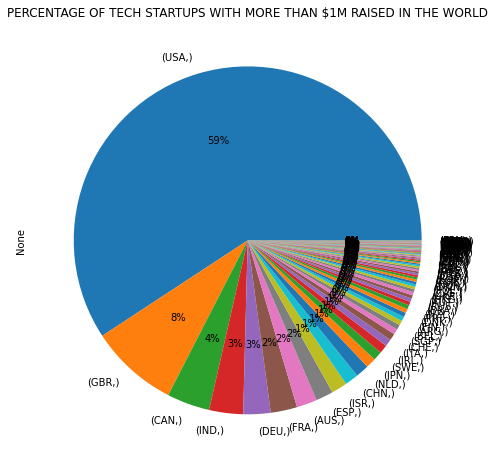

In [381]:
# I analyse the country with more companies according with this filter:
country.value_counts().plot(kind='pie',autopct='%1.0f%%', figsize=(8, 8))
plt.title("PERCENTAGE OF TECH STARTUPS WITH MORE THAN $1M RAISED IN THE WORLD")
country.describe()

,countries
count,4734
unique,50
top,CA
freq,1941


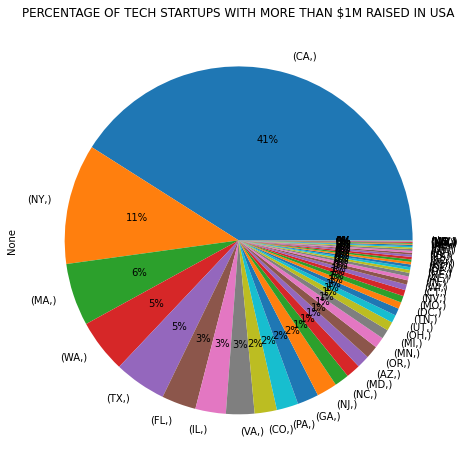

In [382]:
# I do the same with the states of USA:
state = pd.DataFrame({"countries":[j['state_code'] for k in unpack_lst for j in k]})
state.value_counts().plot(kind='pie',autopct='%1.0f%%', figsize=(8, 8))
plt.title("PERCENTAGE OF TECH STARTUPS WITH MORE THAN $1M RAISED IN USA")
state.describe()

## Companies with designers in similar companies

### 1. Query to find all the companies that may have other designers within similar sectors:

In [369]:
# the videogame or similar sector:'web', 'mobile', 'software', 'photo_video':

filter_query={"deadpooled_year":{"$ne":"null"},"category_code":{"$in":['web', 'mobile','games_video', 
                                                                       'software', 'photo_video']}}
project={"offices.country_code":1,'offices.state_code':1,'_id':0}
res=list(db.companies.find(filter_query,project))
df = pd.DataFrame(res)

### 2. Filtering data:

In [371]:
# I discard all companies with no office country code, I clean the "offices" column and I create a dataframe:
df["del_empty"]=[len(value) for  index, value in df["offices"].items()]
df = df[df["del_empty"] >= 1]
unpack_lst=[v for i, v in df["offices"].items()]
country = pd.DataFrame({"countries":[j['country_code'] for k in unpack_lst for j in k]})

### 3. Analysis:

,countries
count,8212
unique,93
top,USA
freq,4865


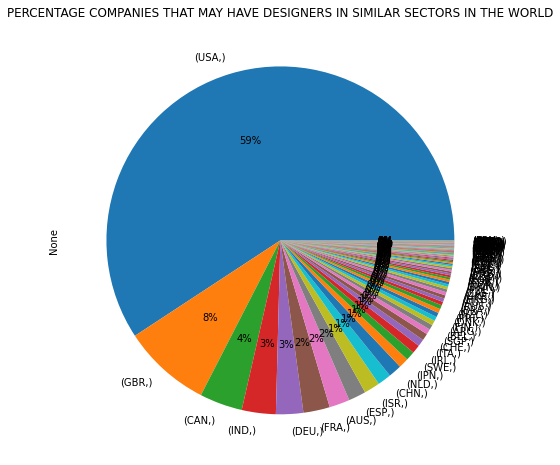

In [386]:
# I analyse which is the country with more companies according with this filter:
country.value_counts().plot(kind='pie',autopct='%1.0f%%', figsize=(8, 8))
plt.title("PERCENTAGE COMPANIES THAT MAY HAVE DESIGNERS IN SIMILAR SECTORS IN THE WORLD")
country.describe()

,countries
count,4734
unique,50
top,CA
freq,1941


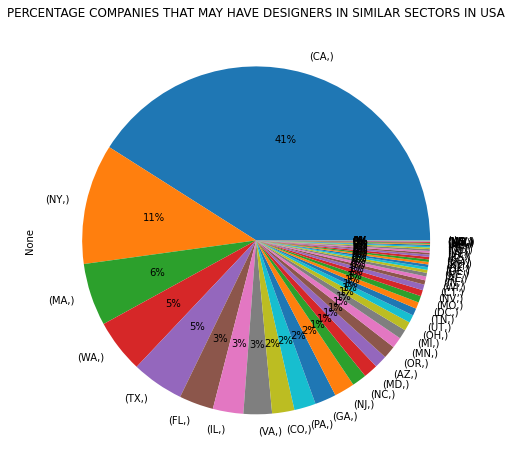

In [385]:
# I do the same with the states of USA:
state = pd.DataFrame({"countries":[j['state_code'] for k in unpack_lst for j in k]})
state.value_counts().plot(kind='pie',autopct='%1.0f%%', figsize=(8, 8))
plt.title("PERCENTAGE COMPANIES THAT MAY HAVE DESIGNERS IN SIMILAR SECTORS IN USA")
state.describe()

# Conclusion

According to these analyses the best country to set up the office is USA and to be more precise, the state of California. Let's see in the following steps where exactely can we establish our business. From now the analysis will be done inside California.